In [1]:
!pip install mediapipe


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

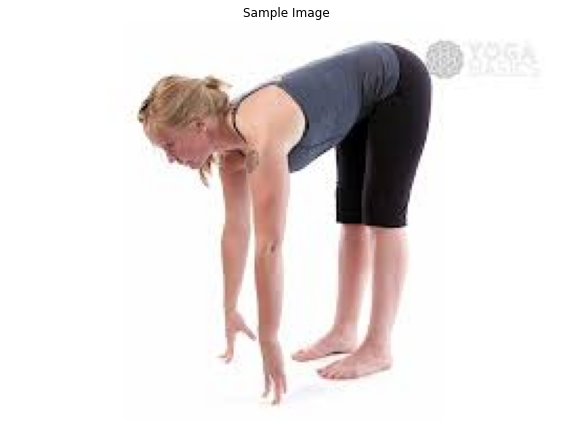

In [28]:
# Read an image from the specified path.
sample_img = cv2.imread('media/sf5.jpeg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [29]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.3026605248451233
y: 0.34529250860214233
z: -0.5274040699005127
visibility: 0.9998144507408142

LEFT_EYE_INNER:
x: 0.29585087299346924
y: 0.31714263558387756
z: -0.5758375525474548
visibility: 0.9997640252113342



In [30]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(2):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 80.5076996088028
y: 65.60557663440704
z: -140.28948259353638
visibility: 0.9998144507408142

LEFT_EYE_INNER:
x: 78.69633221626282
y: 60.25710076093674
z: -153.172788977623
visibility: 0.9997640252113342



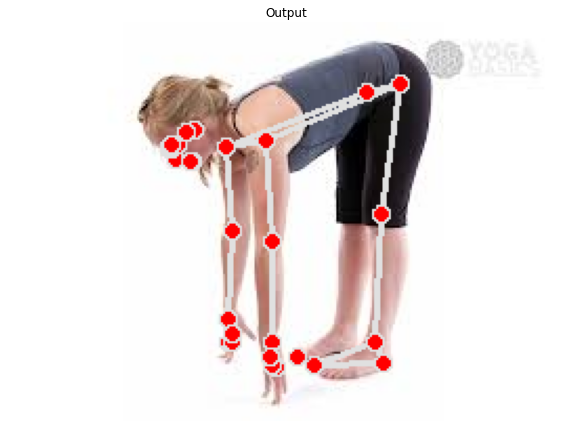

In [31]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

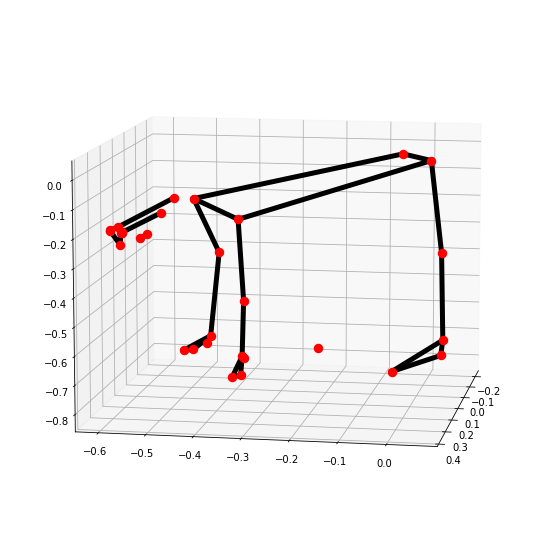

In [32]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [33]:
def detectPose(image, pose, display=True):
   
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

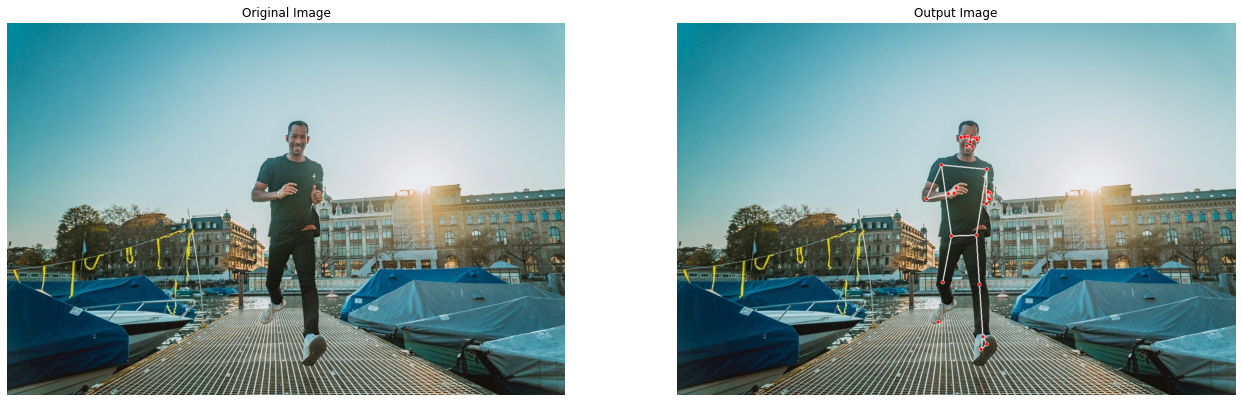

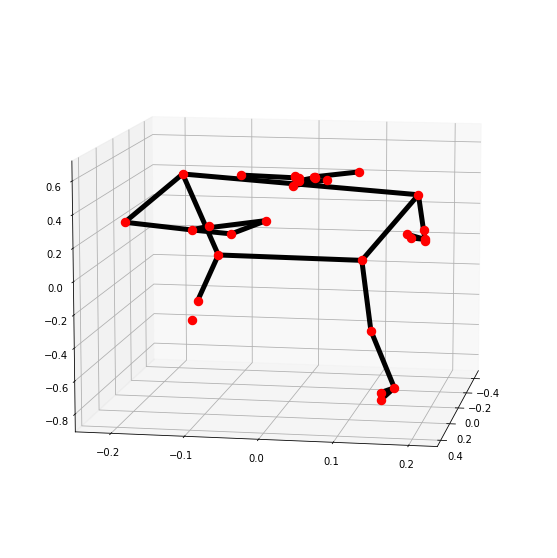

In [34]:
# Read another sample image and perform pose detection on it.
image = cv2.imread('media/sample1.jpg')
detectPose(image, pose, display=True)

In [35]:
# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
# video = cv2.VideoCapture(1)

# Create named window for resizing purposes
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)


# Initialize the VideoCapture object to read from a video stored in the disk.
video = cv2.VideoCapture('media/running.mp4')

# Set video camera size
video.set(3,1280)
video.set(4,960)

# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the video is accessed successfully.
while video.isOpened():
    
    # Read a frame.
    ok, frame = video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Break the loop.
        break
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, _ = detectPose(frame, pose_video, display=False)
    
    # Set the time for this frame to the current time.
    time2 = time()
    
    # Check if the difference between the previous and this frame time > 0 to avoid division by zero.
    if (time2 - time1) > 0:
    
        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)
        
        # Write the calculated number of frames per second on the frame. 
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    # Update the previous frame time to this frame time.
    # As this frame will become previous frame in next iteration.
    time1 = time2
    
    # Display the frame.
    cv2.imshow('Pose Detection', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break

# Release the VideoCapture object.
video.release()

# Close the windows.
# cv2.destroyAllWindows()

In [36]:
def calculateAngle(landmark1, landmark2, landmark3):
 

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle

In [37]:
# Calculate the angle between the three landmarks.
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))

# Display the calculated angle.
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [38]:
def classifyPose(landmarks, output_image, display=False):
    '''
    This function classifies yoga poses depending upon the angles of various body joints.
    Args:
        landmarks: A list of detected landmarks of the person whose pose needs to be classified.
        output_image: A image of the person with the detected pose landmarks drawn.
        display: A boolean value that is if set to true the function displays the resultant image with the pose label 
        written on it and returns nothing.
    Returns:
        output_image: The image with the detected pose landmarks drawn and pose label written.
        label: The classified pose label of the person in the output_image.

    '''
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
   
    print(f'The calculated  left_elbow_angle is {left_elbow_angle}')
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    print(f'The calculated  right_elbow_angle is {right_elbow_angle}')
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    
    print(f'The calculated  left_shoulder_angle is {left_shoulder_angle}')
    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
   
    print(f'The calculated  right_shoulder_angle is {right_shoulder_angle}')
    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    print(f'The calculated  left_knee_angle is {left_knee_angle}')
    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    print(f'The calculated  right_knee_angle is {right_knee_angle}')
    
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the standing fold pose or the Tadasana pose.
    # As for both of them, both legs should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the both legs are straight.
    if left_knee_angle > 155 and left_knee_angle < 195 or right_knee_angle > 155 and right_knee_angle < 195:
   

        # Check if shoulders are at the required angle.
#         if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
        if left_knee_angle > 155 and left_knee_angle < 195 or right_knee_angle > 155 and right_knee_angle < 195:
    # Check if it is the warrior II pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if one leg is straight.
          
            if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
                # Check if the other leg is bended at the required angle.
#                 if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
                if left_shoulder_angle > 230 and left_shoulder_angle < 275 and right_shoulder_angle > 90 and right_shoulder_angle < 150:
                    # Specify the label of the pose that is Warrior II pose.
#                     label = 'Warrior II Pose' 
                      label = 'Standing fold/Uttanasana'
                        
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the Tadasana.
    #----------------------------------------------------------------------------------------------------------------
    
            # Check if both legs are straight
#             if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
            if left_elbow_angle > 145 and left_elbow_angle < 180 and right_elbow_angle > 180 and right_elbow_angle < 220:
                if left_shoulder_angle > 165 and left_shoulder_angle < 195 and right_shoulder_angle > 165 and right_shoulder_angle < 195:
                # Specify the label of the pose that is tree pose.
                    label = 'Tadasana'

    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the chair pose.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if one leg is straight
    if left_knee_angle > 75 and left_knee_angle < 145 or right_knee_angle > 75 and right_knee_angle < 145:

        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 75 and left_knee_angle < 145 or right_knee_angle > 75 and right_knee_angle < 145:
            if left_elbow_angle > 175 and left_elbow_angle < 215 and right_elbow_angle > 175 and right_elbow_angle < 215:
                if left_shoulder_angle > 165 and left_shoulder_angle < 250 and right_shoulder_angle > 115 and right_shoulder_angle < 200:
            # Specify the label of the pose that is tree pose.
                    label = 'Chair Pose/ Utkatasana'
                
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0, 255, 0)  
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label

The calculated  left_elbow_angle is 167.7635319185358
The calculated  right_elbow_angle is 189.78240703180728
The calculated  left_shoulder_angle is 182.2380065139803
The calculated  right_shoulder_angle is 184.95027223429173
The calculated  left_knee_angle is 180.23272444082988
The calculated  right_knee_angle is 178.069412558833


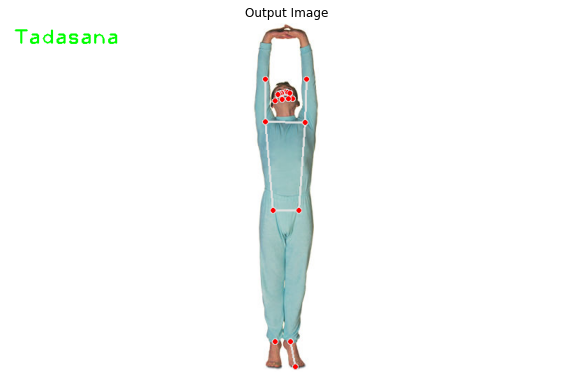

In [39]:
image = cv2.imread('media/t1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

The calculated  left_elbow_angle is 194.99619164599966
The calculated  right_elbow_angle is 193.63429482505148
The calculated  left_shoulder_angle is 230.44501420632508
The calculated  right_shoulder_angle is 134.14073564369383
The calculated  left_knee_angle is 183.8322697461948
The calculated  right_knee_angle is 179.0931737010716


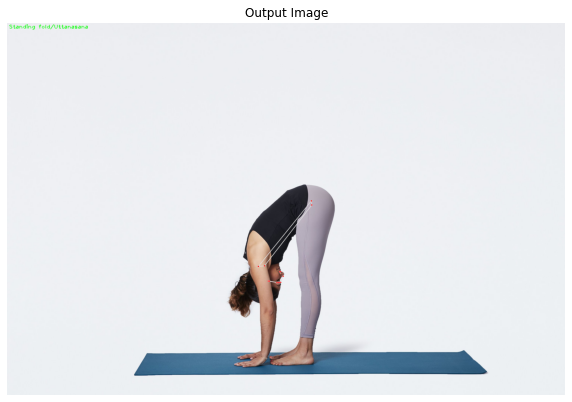

In [40]:
# Read another sample image and perform pose classification on it.
image = cv2.imread('media/s2.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

The calculated  left_elbow_angle is 198.82471001824007
The calculated  right_elbow_angle is 197.2495352391819
The calculated  left_shoulder_angle is 184.58609889617085
The calculated  right_shoulder_angle is 170.64380904306694
The calculated  left_knee_angle is 85.49828970455154
The calculated  right_knee_angle is 90.89354737143657


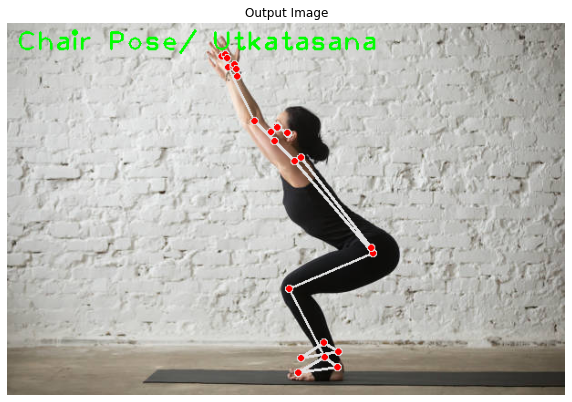

In [41]:
# Read a sample image and perform pose classification on it.
image = cv2.imread('media/chair.jpg')
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

The calculated  left_elbow_angle is 187.21116095749863
The calculated  right_elbow_angle is 187.90273934316542
The calculated  left_shoulder_angle is 250.54754566633954
The calculated  right_shoulder_angle is 108.91611207649886
The calculated  left_knee_angle is 159.3203464461349
The calculated  right_knee_angle is 160.52934685472755


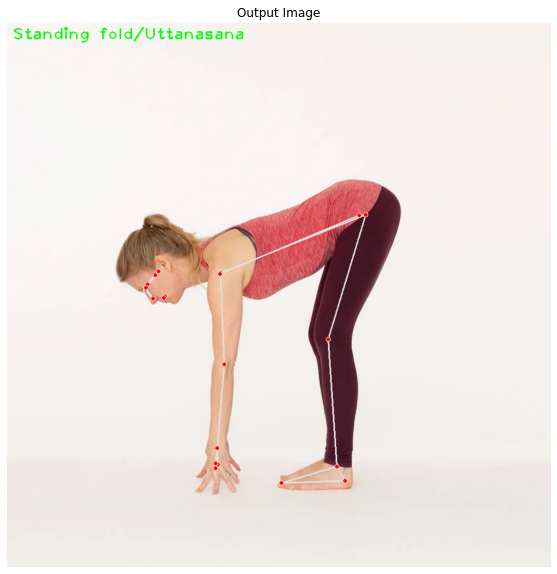

In [42]:
# Read another sample image and perform pose classification on it.
image = cv2.imread('media/standing.jpg')
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [45]:
# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Continue to the next iteration to read the next frame and ignore the empty camera frame.
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, landmarks = detectPose(frame, pose_video, display=False)
    
    # Check if the landmarks are detected.
    if landmarks:
        
        # Perform the Pose Classification.
        frame, _ = classifyPose(landmarks, frame, display=False)
    
    # Display the frame.
    cv2.imshow('Pose Classification', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break

# Release the VideoCapture object and close the windows.
camera_video.release()
cv2.destroyAllWindows()

The calculated  left_elbow_angle is 178.95337348263848
The calculated  right_elbow_angle is 179.44265888987968
The calculated  left_shoulder_angle is 26.332547840776332
The calculated  right_shoulder_angle is 23.93069152602387
The calculated  left_knee_angle is 180.51145572785146
The calculated  right_knee_angle is 178.7714272786633
The calculated  left_elbow_angle is 178.63175262236487
The calculated  right_elbow_angle is 185.49910552395926
The calculated  left_shoulder_angle is 24.954296050375078
The calculated  right_shoulder_angle is 23.355564859286005
The calculated  left_knee_angle is 180.3964314715076
The calculated  right_knee_angle is 178.73399209229007
The calculated  left_elbow_angle is 178.27972383329455
The calculated  right_elbow_angle is 184.369640739565
The calculated  left_shoulder_angle is 24.441726579791034
The calculated  right_shoulder_angle is 23.304997175209547
The calculated  left_knee_angle is 180.35051649924216
The calculated  right_knee_angle is 178.621232906

The calculated  left_shoulder_angle is 23.488530464108223
The calculated  right_shoulder_angle is 22.77572664577915
The calculated  left_knee_angle is 178.97398785268393
The calculated  right_knee_angle is 180.84907666105508
The calculated  left_elbow_angle is 178.73969819546613
The calculated  right_elbow_angle is 185.61602079976126
The calculated  left_shoulder_angle is 23.464119586475167
The calculated  right_shoulder_angle is 22.724393939296323
The calculated  left_knee_angle is 179.15598706838227
The calculated  right_knee_angle is 181.21887523513132
The calculated  left_elbow_angle is 180.8801203324911
The calculated  right_elbow_angle is 181.17601165458433
The calculated  left_shoulder_angle is 23.583375563502074
The calculated  right_shoulder_angle is 24.345486903820312
The calculated  left_knee_angle is 179.88445441340866
The calculated  right_knee_angle is 179.87372266202146
The calculated  left_elbow_angle is 182.24685208196146
The calculated  right_elbow_angle is 179.011475

The calculated  left_elbow_angle is 182.02729549913806
The calculated  right_elbow_angle is 180.7595946001612
The calculated  left_shoulder_angle is 22.284704063031878
The calculated  right_shoulder_angle is 21.371665699248062
The calculated  left_knee_angle is 179.4275850155424
The calculated  right_knee_angle is 181.47171125279786
The calculated  left_elbow_angle is 182.02729549913806
The calculated  right_elbow_angle is 180.44299977664392
The calculated  left_shoulder_angle is 22.18315648225362
The calculated  right_shoulder_angle is 21.44331452454886
The calculated  left_knee_angle is 179.6124243146189
The calculated  right_knee_angle is 181.29864434028082
The calculated  left_elbow_angle is 178.51110971110452
The calculated  right_elbow_angle is 179.84185506083625
The calculated  left_shoulder_angle is 22.562394031406498
The calculated  right_shoulder_angle is 21.795107312008646
The calculated  left_knee_angle is 179.87282321447015
The calculated  right_knee_angle is 181.883210408

The calculated  left_elbow_angle is 179.10536319931094
The calculated  right_elbow_angle is 183.0905926712282
The calculated  left_shoulder_angle is 22.070679371173085
The calculated  right_shoulder_angle is 23.59543996149989
The calculated  left_knee_angle is 179.56398541350447
The calculated  right_knee_angle is 180.06530527982238
The calculated  left_elbow_angle is 180.5757636176907
The calculated  right_elbow_angle is 182.89356171354484
The calculated  left_shoulder_angle is 22.19858141386803
The calculated  right_shoulder_angle is 22.974704920316544
The calculated  left_knee_angle is 179.3930634013444
The calculated  right_knee_angle is 180.77920175530355
The calculated  left_elbow_angle is 176.12840742958772
The calculated  right_elbow_angle is 180.78002822933703
The calculated  left_shoulder_angle is 22.283611595656996
The calculated  right_shoulder_angle is 22.71222410765707
The calculated  left_knee_angle is 179.395361407616
The calculated  right_knee_angle is 181.565729850965

The calculated  left_elbow_angle is 181.7277140823927
The calculated  right_elbow_angle is 183.542057090277
The calculated  left_shoulder_angle is 21.74985475918323
The calculated  right_shoulder_angle is 22.875087882971027
The calculated  left_knee_angle is 179.35329061047747
The calculated  right_knee_angle is 181.19705104388873
The calculated  left_elbow_angle is 181.5439002474431
The calculated  right_elbow_angle is 183.52125099199694
The calculated  left_shoulder_angle is 21.790397286083717
The calculated  right_shoulder_angle is 23.0267630819516
The calculated  left_knee_angle is 179.35422279845753
The calculated  right_knee_angle is 180.87194435273184
The calculated  left_elbow_angle is 180.6509679211541
The calculated  right_elbow_angle is 183.6883530034034
The calculated  left_shoulder_angle is 21.45807360617842
The calculated  right_shoulder_angle is 22.95979923746833
The calculated  left_knee_angle is 179.0423015797192
The calculated  right_knee_angle is 180.86892725037484
T

The calculated  left_elbow_angle is 181.00000162234556
The calculated  right_elbow_angle is 185.57674870890148
The calculated  left_shoulder_angle is 22.064010300067135
The calculated  right_shoulder_angle is 22.180509378841272
The calculated  left_knee_angle is 179.5138240618753
The calculated  right_knee_angle is 181.36380356248245
The calculated  left_elbow_angle is 180.10398496661767
The calculated  right_elbow_angle is 182.7953695726366
The calculated  left_shoulder_angle is 21.89841909854406
The calculated  right_shoulder_angle is 24.822755006479806
The calculated  left_knee_angle is 179.3795161802368
The calculated  right_knee_angle is 179.12630087519503
The calculated  left_elbow_angle is 179.3668643086181
The calculated  right_elbow_angle is 183.2967455115043
The calculated  left_shoulder_angle is 21.65603986858049
The calculated  right_shoulder_angle is 24.72660404837136
The calculated  left_knee_angle is 179.34221081128385
The calculated  right_knee_angle is 179.092133565045

The calculated  left_elbow_angle is 186.28536178750906
The calculated  right_elbow_angle is 182.09343064337307
The calculated  left_shoulder_angle is 22.26839493768075
The calculated  right_shoulder_angle is 23.827106822239898
The calculated  left_knee_angle is 179.54493374782456
The calculated  right_knee_angle is 181.13930510221235
The calculated  left_elbow_angle is 186.62862861636972
The calculated  right_elbow_angle is 182.22828365594162
The calculated  left_shoulder_angle is 22.095466705430805
The calculated  right_shoulder_angle is 23.926751903194432
The calculated  left_knee_angle is 179.23018857358895
The calculated  right_knee_angle is 180.63062415627866
The calculated  left_elbow_angle is 186.4272932695665
The calculated  right_elbow_angle is 181.86606987646783
The calculated  left_shoulder_angle is 21.915849929003723
The calculated  right_shoulder_angle is 24.16481486559246
The calculated  left_knee_angle is 178.7388866200788
The calculated  right_knee_angle is 180.44234848

The calculated  left_elbow_angle is 237.53755081815368
The calculated  right_elbow_angle is 183.8473675909367
The calculated  left_shoulder_angle is 1.7868898400352322
The calculated  right_shoulder_angle is 18.282852735874314
The calculated  left_knee_angle is 177.34037430088483
The calculated  right_knee_angle is 176.66118121733297
The calculated  left_elbow_angle is 241.92198578464334
The calculated  right_elbow_angle is 186.527317529287
The calculated  left_shoulder_angle is 0.8541414097120167
The calculated  right_shoulder_angle is 18.361018825870087
The calculated  left_knee_angle is 177.4927361362553
The calculated  right_knee_angle is 176.6368933012982
The calculated  left_elbow_angle is 237.3940551658124
The calculated  right_elbow_angle is 187.15470257144185
The calculated  left_shoulder_angle is 0.7439317281938734
The calculated  right_shoulder_angle is 18.334849198185392
The calculated  left_knee_angle is 177.5250940049533
The calculated  right_knee_angle is 176.35340465959

The calculated  left_elbow_angle is 209.451690731592
The calculated  right_elbow_angle is 161.8702906120189
The calculated  left_shoulder_angle is 19.965837259268188
The calculated  right_shoulder_angle is 13.33012651621013
The calculated  left_knee_angle is 179.92924322714757
The calculated  right_knee_angle is 177.3954063924483
The calculated  left_elbow_angle is 208.3668980506373
The calculated  right_elbow_angle is 160.47178088793046
The calculated  left_shoulder_angle is 19.524750063899543
The calculated  right_shoulder_angle is 12.727552289717476
The calculated  left_knee_angle is 179.43174525343585
The calculated  right_knee_angle is 175.30215545553565
The calculated  left_elbow_angle is 208.36785752661274
The calculated  right_elbow_angle is 163.3886530084508
The calculated  left_shoulder_angle is 18.887771022077043
The calculated  right_shoulder_angle is 12.77647757683482
The calculated  left_knee_angle is 177.79953079791534
The calculated  right_knee_angle is 176.304953756004

The calculated  left_elbow_angle is 175.17043700606055
The calculated  right_elbow_angle is 180.69386952235413
The calculated  left_shoulder_angle is 13.00093130416232
The calculated  right_shoulder_angle is 12.500401276420437
The calculated  left_knee_angle is 177.89956714595044
The calculated  right_knee_angle is 176.61177406300004
The calculated  left_elbow_angle is 173.42790868731015
The calculated  right_elbow_angle is 181.84648719369505
The calculated  left_shoulder_angle is 12.5864348252621
The calculated  right_shoulder_angle is 11.720244818572127
The calculated  left_knee_angle is 177.84956816679124
The calculated  right_knee_angle is 174.94382611150544
The calculated  left_elbow_angle is 172.58473395811254
The calculated  right_elbow_angle is 174.2820776934309
The calculated  left_shoulder_angle is 13.622244983534333
The calculated  right_shoulder_angle is 10.29371476678783
The calculated  left_knee_angle is 179.11598097573793
The calculated  right_knee_angle is 179.715823924

The calculated  left_elbow_angle is 171.28828462473737
The calculated  right_elbow_angle is 166.50049879144038
The calculated  left_shoulder_angle is 26.531777296926517
The calculated  right_shoulder_angle is 24.835099920871777
The calculated  left_knee_angle is 182.70312050621408
The calculated  right_knee_angle is 178.28177055872337
The calculated  left_elbow_angle is 168.7488192476165
The calculated  right_elbow_angle is 169.06815640130063
The calculated  left_shoulder_angle is 25.57395167552231
The calculated  right_shoulder_angle is 27.658501096886983
The calculated  left_knee_angle is 182.39103366566604
The calculated  right_knee_angle is 178.5399251724269
The calculated  left_elbow_angle is 172.74408621023184
The calculated  right_elbow_angle is 166.3915270047001
The calculated  left_shoulder_angle is 26.349039989194278
The calculated  right_shoulder_angle is 28.147019482464966
The calculated  left_knee_angle is 182.96093613416375
The calculated  right_knee_angle is 178.36451348

The calculated  left_elbow_angle is 167.76253691363948
The calculated  right_elbow_angle is 166.40732031020877
The calculated  left_shoulder_angle is 21.6401647539355
The calculated  right_shoulder_angle is 13.064303222742062
The calculated  left_knee_angle is 180.90567385047214
The calculated  right_knee_angle is 181.11120267043339
The calculated  left_elbow_angle is 169.74164273701166
The calculated  right_elbow_angle is 167.34530608571714
The calculated  left_shoulder_angle is 21.323765973707985
The calculated  right_shoulder_angle is 13.041758651019705
The calculated  left_knee_angle is 180.75502536034514
The calculated  right_knee_angle is 180.74835269049942
The calculated  left_elbow_angle is 173.5608686993656
The calculated  right_elbow_angle is 153.92245896361408
The calculated  left_shoulder_angle is 20.859129652834806
The calculated  right_shoulder_angle is 18.366657375919136
The calculated  left_knee_angle is 180.53526659324498
The calculated  right_knee_angle is 178.6311873

The calculated  left_elbow_angle is 161.9231234618882
The calculated  right_elbow_angle is 168.9750258409623
The calculated  left_shoulder_angle is 20.911379324849175
The calculated  right_shoulder_angle is 22.675726011096597
The calculated  left_knee_angle is 179.42412780986365
The calculated  right_knee_angle is 179.91947954852805
The calculated  left_elbow_angle is 161.17059725564107
The calculated  right_elbow_angle is 177.8887173451227
The calculated  left_shoulder_angle is 20.799460442556214
The calculated  right_shoulder_angle is 23.959494760710726
The calculated  left_knee_angle is 179.90880970451144
The calculated  right_knee_angle is 180.07837101622744
The calculated  left_elbow_angle is 161.5848106128436
The calculated  right_elbow_angle is 176.8161784494598
The calculated  left_shoulder_angle is 20.83580793410335
The calculated  right_shoulder_angle is 24.603915697341034
The calculated  left_knee_angle is 179.75559535406742
The calculated  right_knee_angle is 179.9259148364

The calculated  left_elbow_angle is 173.69640907629855
The calculated  right_elbow_angle is 136.89400007809846
The calculated  left_shoulder_angle is 19.89224048002417
The calculated  right_shoulder_angle is 37.30515367147686
The calculated  left_knee_angle is 182.2315506065318
The calculated  right_knee_angle is 179.9719311458333
The calculated  left_elbow_angle is 171.58304213590313
The calculated  right_elbow_angle is 126.69641189064185
The calculated  left_shoulder_angle is 17.570432785797767
The calculated  right_shoulder_angle is 31.60376869431138
The calculated  left_knee_angle is 181.86466188961904
The calculated  right_knee_angle is 182.46929972460885
The calculated  left_elbow_angle is 171.14171660995558
The calculated  right_elbow_angle is 131.67672023388167
The calculated  left_shoulder_angle is 20.06249540944151
The calculated  right_shoulder_angle is 23.563480725501755
The calculated  left_knee_angle is 182.30385686686557
The calculated  right_knee_angle is 182.9334046197

The calculated  left_elbow_angle is 211.7733111408697
The calculated  right_elbow_angle is 168.24493724030054
The calculated  left_shoulder_angle is 21.47556628083195
The calculated  right_shoulder_angle is 17.1166317403312
The calculated  left_knee_angle is 179.2769853080535
The calculated  right_knee_angle is 175.5354301297629
The calculated  left_elbow_angle is 208.51738192830956
The calculated  right_elbow_angle is 165.25119432606513
The calculated  left_shoulder_angle is 21.166150408552603
The calculated  right_shoulder_angle is 18.030954943753706
The calculated  left_knee_angle is 178.8643889620117
The calculated  right_knee_angle is 174.69304983295626
The calculated  left_elbow_angle is 201.64746436211152
The calculated  right_elbow_angle is 164.49864545016797
The calculated  left_shoulder_angle is 20.985038991366302
The calculated  right_shoulder_angle is 18.02149421876947
The calculated  left_knee_angle is 179.96054915965678
The calculated  right_knee_angle is 177.492298272933

The calculated  left_elbow_angle is 186.05292758899319
The calculated  right_elbow_angle is 180.77404289770664
The calculated  left_shoulder_angle is 18.96886305229563
The calculated  right_shoulder_angle is 9.40413774024134
The calculated  left_knee_angle is 183.32312044513543
The calculated  right_knee_angle is 174.43871283215847
The calculated  left_elbow_angle is 184.94330946243886
The calculated  right_elbow_angle is 179.115957487482
The calculated  left_shoulder_angle is 18.939699623892235
The calculated  right_shoulder_angle is 8.901135586173318
The calculated  left_knee_angle is 185.10918785314584
The calculated  right_knee_angle is 174.58813084768298
The calculated  left_elbow_angle is 183.7897103470115
The calculated  right_elbow_angle is 179.71825274055095
The calculated  left_shoulder_angle is 19.525548332942993
The calculated  right_shoulder_angle is 9.066290076392848
The calculated  left_knee_angle is 185.0231577899955
The calculated  right_knee_angle is 174.2410223798523

The calculated  left_elbow_angle is 138.8307573839798
The calculated  right_elbow_angle is 212.9471732310493
The calculated  left_shoulder_angle is 125.23009298759838
The calculated  right_shoulder_angle is 140.06068492285593
The calculated  left_knee_angle is 183.90737674548413
The calculated  right_knee_angle is 177.92727195371447
The calculated  left_elbow_angle is 138.55086099705534
The calculated  right_elbow_angle is 212.4151618829775
The calculated  left_shoulder_angle is 127.40069299187938
The calculated  right_shoulder_angle is 141.79181836674553
The calculated  left_knee_angle is 185.21926452798823
The calculated  right_knee_angle is 177.19393663590836
The calculated  left_elbow_angle is 144.73712955343476
The calculated  right_elbow_angle is 206.34283207343017
The calculated  left_shoulder_angle is 142.16855968150406
The calculated  right_shoulder_angle is 152.31528581986854
The calculated  left_knee_angle is 187.30508330616308
The calculated  right_knee_angle is 174.4183287

The calculated  right_shoulder_angle is 172.2131577206158
The calculated  left_knee_angle is 178.84825419980874
The calculated  right_knee_angle is 160.0380064659953
The calculated  left_elbow_angle is 173.2009294583364
The calculated  right_elbow_angle is 200.54695786367026
The calculated  left_shoulder_angle is 182.55694499263865
The calculated  right_shoulder_angle is 172.2131577206158
The calculated  left_knee_angle is 178.84825419980874
The calculated  right_knee_angle is 160.2145722537962
The calculated  left_elbow_angle is 174.60046897133762
The calculated  right_elbow_angle is 200.42325017786314
The calculated  left_shoulder_angle is 183.3385709967058
The calculated  right_shoulder_angle is 172.34764271763441
The calculated  left_knee_angle is 176.99185197105479
The calculated  right_knee_angle is 165.0190884013037
The calculated  left_elbow_angle is 174.62695800297467
The calculated  right_elbow_angle is 200.42325017786314
The calculated  left_shoulder_angle is 183.36506002834

The calculated  left_elbow_angle is 177.3974377975002
The calculated  right_elbow_angle is 201.44875452051426
The calculated  left_shoulder_angle is 184.522454146402
The calculated  right_shoulder_angle is 170.074999494424
The calculated  left_knee_angle is 179.60609097697682
The calculated  right_knee_angle is 169.61762891879155
The calculated  left_elbow_angle is 176.74805439963612
The calculated  right_elbow_angle is 200.86128465452438
The calculated  left_shoulder_angle is 184.5480424091254
The calculated  right_shoulder_angle is 169.74791900198875
The calculated  left_knee_angle is 180.0
The calculated  right_knee_angle is 171.91251257254382
The calculated  left_elbow_angle is 176.78451600825179
The calculated  right_elbow_angle is 201.44875452051426
The calculated  left_shoulder_angle is 184.522454146402
The calculated  right_shoulder_angle is 170.074999494424
The calculated  left_knee_angle is 179.64514739868005
The calculated  right_knee_angle is 170.6617117577784
The calculate

The calculated  left_elbow_angle is 164.79276457812875
The calculated  right_elbow_angle is 197.83714310094967
The calculated  left_shoulder_angle is 179.725081494483
The calculated  right_shoulder_angle is 172.28103515833678
The calculated  left_knee_angle is 187.43254210313157
The calculated  right_knee_angle is 165.45024596049902
The calculated  left_elbow_angle is 166.12121945472228
The calculated  right_elbow_angle is 198.39246205344838
The calculated  left_shoulder_angle is 180.70903183160905
The calculated  right_shoulder_angle is 171.29808113013624
The calculated  left_knee_angle is 187.06760576740092
The calculated  right_knee_angle is 164.4949558176877
The calculated  left_elbow_angle is 166.1575408422499
The calculated  right_elbow_angle is 198.50180501138075
The calculated  left_shoulder_angle is 180.64760277617685
The calculated  right_shoulder_angle is 171.18506017891625
The calculated  left_knee_angle is 185.14259518638988
The calculated  right_knee_angle is 172.48036627

The calculated  right_elbow_angle is 199.49460059675798
The calculated  left_shoulder_angle is 180.03152232926607
The calculated  right_shoulder_angle is 170.55889795887546
The calculated  left_knee_angle is 183.5860537607418
The calculated  right_knee_angle is 166.78431570506623
The calculated  left_elbow_angle is 173.05649026519137
The calculated  right_elbow_angle is 199.49460059675798
The calculated  left_shoulder_angle is 180.0
The calculated  right_shoulder_angle is 170.55889795887546
The calculated  left_knee_angle is 184.13097001629333
The calculated  right_knee_angle is 166.78431570506623
The calculated  left_elbow_angle is 172.47692992844637
The calculated  right_elbow_angle is 200.80507394653847
The calculated  left_shoulder_angle is 179.7423768282855
The calculated  right_shoulder_angle is 169.84378271589625
The calculated  left_knee_angle is 181.65928094837253
The calculated  right_knee_angle is 167.0811823723909
The calculated  left_elbow_angle is 172.45633718030643
The c

The calculated  left_elbow_angle is 49.81166384521205
The calculated  right_elbow_angle is 321.21563589970265
The calculated  left_shoulder_angle is 76.46219625205089
The calculated  right_shoulder_angle is 60.30797457322359
The calculated  left_knee_angle is 179.12532322887867
The calculated  right_knee_angle is 174.31192193543262
The calculated  left_elbow_angle is 358.74505338993583
The calculated  right_elbow_angle is 358.12621532764297
The calculated  left_shoulder_angle is 42.75524551809839
The calculated  right_shoulder_angle is 31.634556083157413
The calculated  left_knee_angle is 179.691546562641
The calculated  right_knee_angle is 176.10870029335484
The calculated  left_elbow_angle is 189.89446813743447
The calculated  right_elbow_angle is 169.96664241885964
The calculated  left_shoulder_angle is 32.95923715084349
The calculated  right_shoulder_angle is 27.338544292410948
The calculated  left_knee_angle is 178.70686992155655
The calculated  right_knee_angle is 175.01300020786